# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [24, 6, 5, 4, 6, 5, 4, 5, 3, 3, 6, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 5, 4, 3, 4, 4, 5, 4, 5, 4, 3, 5, 4, 6, 5, 3, 3, 3, 3, 6, 6, 4, 5, 5, 3, 3, 5, 10, 6, 5, 4, 4, 5, 3, 5, 3, 6, 3, 5, 5, 4, 3, 3, 6, 3, 3, 6, 3, 6, 5, 4, 7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 4, 4, 3, 4, 3, 6, 5, 9, 4, 3, 4, 4, 3, 6, 3, 3, 7], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


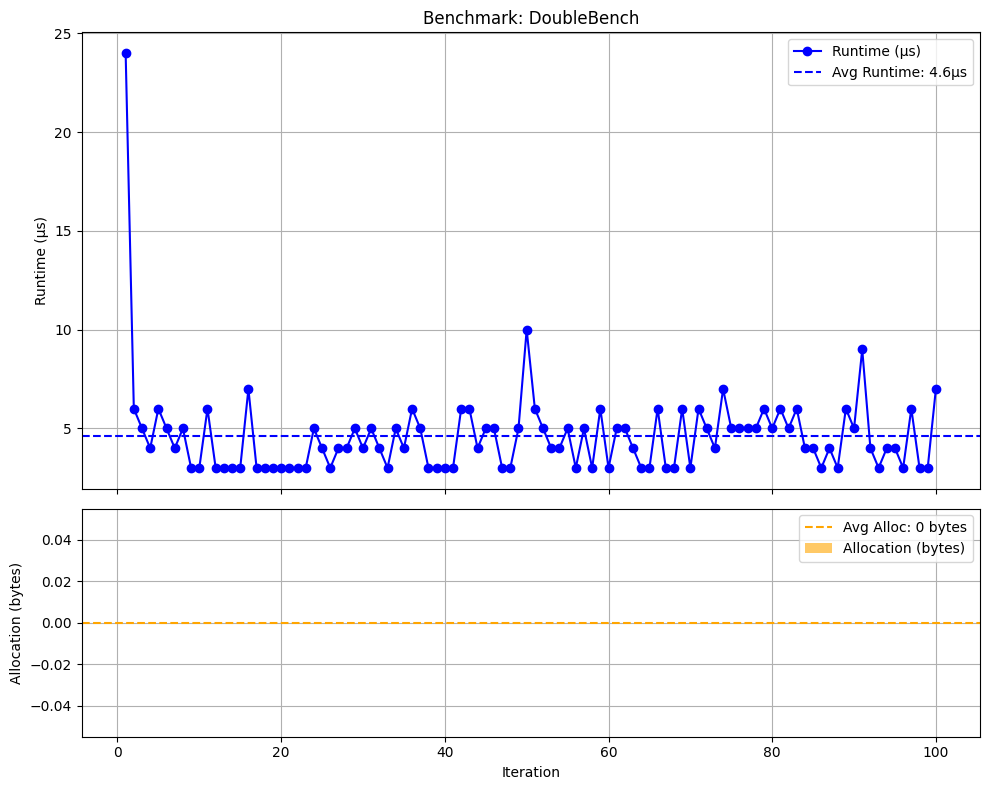

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [10, 7, 7, 8, 9, 9, 8, 7, 7, 7, 8, 7, 7, 7, 7, 6, 8, 6, 6, 6, 9, 7, 8, 9, 7, 6, 9, 6, 7, 9, 6, 8, 8, 7, 6, 10, 7, 9, 7, 7, 9, 7, 7, 7, 10, 10, 7, 10, 8, 6, 10, 9, 9, 9, 7, 7, 10, 6, 6, 10, 12, 9, 7, 7, 6, 9, 7, 9, 7, 7, 6, 10, 7, 10, 6, 11, 7, 6, 8, 6, 7, 10, 8, 8, 12, 7, 6, 10, 6, 8, 7, 10, 8, 9, 6, 11, 9, 12, 7, 6], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


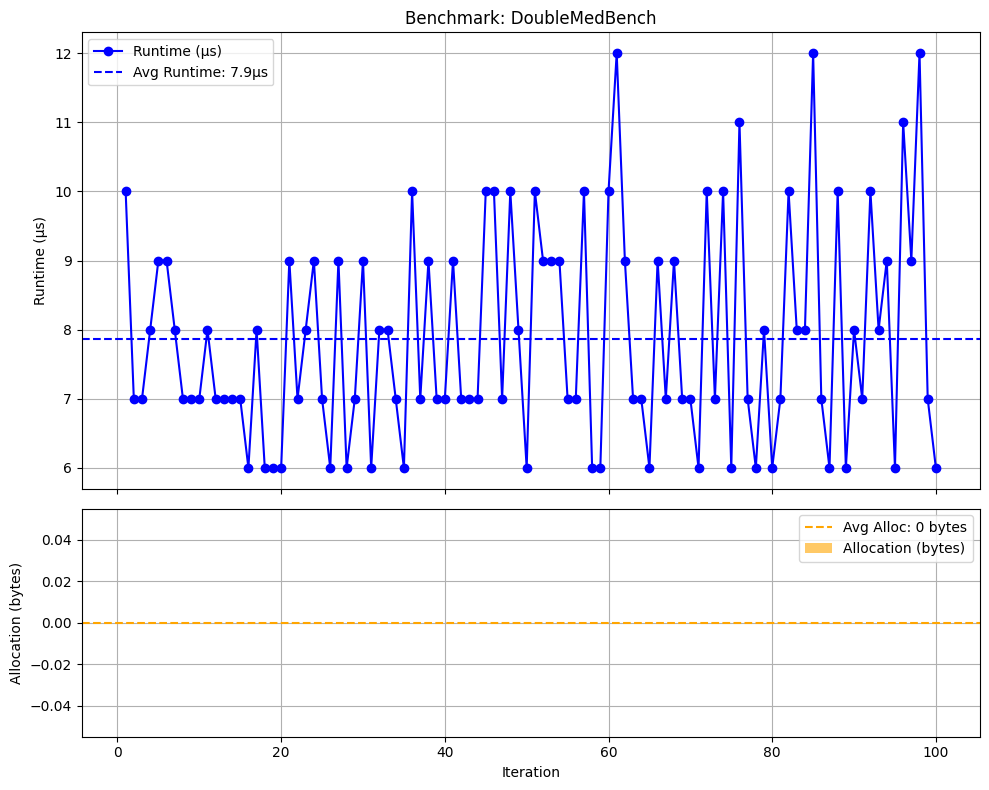

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [10950, 10377, 10331, 10245, 10177, 10210, 10293, 10481, 10243, 10315, 10345, 10279, 10339, 10326, 10456, 10274, 10352, 10289, 10253, 10342, 10186, 10399, 10281, 10466, 10262, 10380, 10074, 10427, 10327, 10363, 10297, 10335, 10303, 10269, 10472, 10293, 10319, 10201, 10303, 10360, 10274, 10293, 10280, 10381, 10284, 10130, 10252, 10391, 10406, 10332, 10358, 10320, 10294, 10288, 10178, 10382, 10204, 10372, 10413, 10239, 10286, 10421, 10214, 10322, 10305, 10660, 10478, 10462, 10333, 10226, 10260, 10348, 10302, 10310, 10365, 10254, 10267, 10288, 10304, 10315, 10220, 10190, 10109, 10308, 10277, 10255, 10354, 10363, 10316, 10174, 10328, 10213, 10308, 10334, 10388, 10380, 10271, 10167, 10242, 10459], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

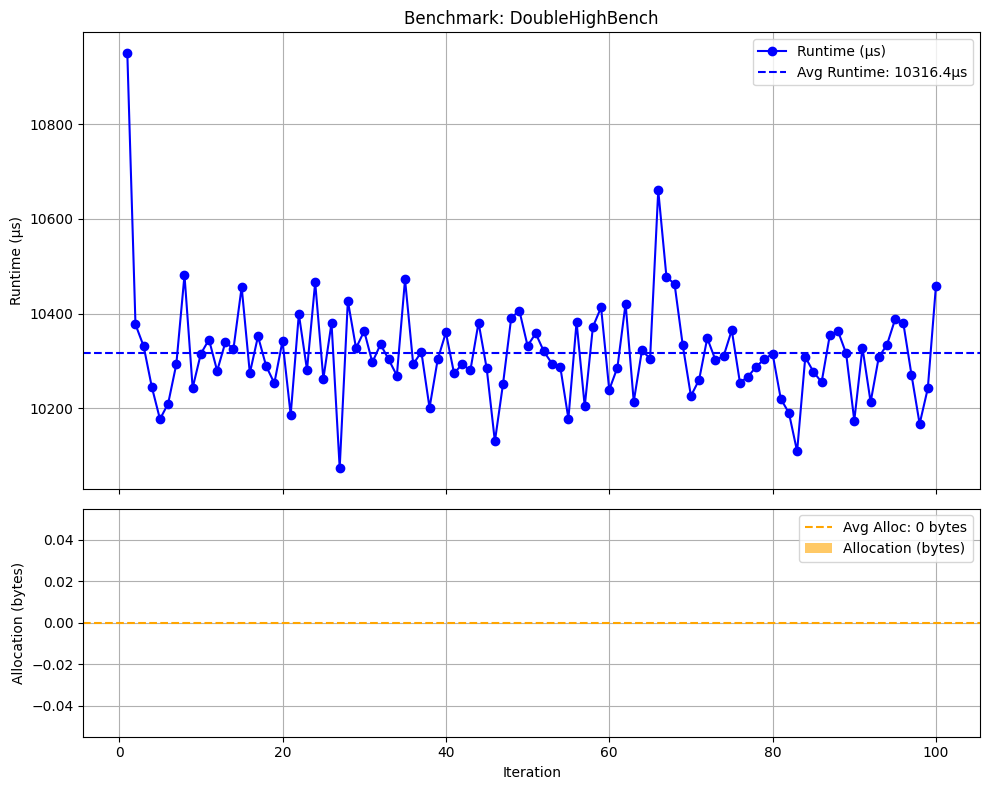

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1239, 1139, 1136, 1109, 1107, 1100, 1119, 1096, 1114, 1093, 1099, 1102, 1089, 1111, 1129, 1098, 1093, 1122, 1092, 1165, 1113, 1110, 1139, 1100, 1129, 1179, 1176, 1100, 1159, 1123, 1139, 1135, 1089, 1094, 1121, 1127, 1136, 1106, 1147, 1111, 1114, 1125, 1112, 1087, 1154, 1210, 1092, 1291, 1105, 1138, 1086, 1089, 1118, 1102, 1097, 1087, 1106, 1180, 1088, 1132, 1115, 1109, 1107, 1102, 1135, 1087, 1110, 1115, 1111, 1111, 1147, 1119, 1132, 1121, 1102, 1147, 1088, 1105, 1139, 1096, 1088, 1124, 1110, 1092, 1119, 1086, 1119, 1128, 1092, 1174, 1118, 1093, 1169, 1176, 1114, 1105, 1096, 1188, 1111, 1122], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


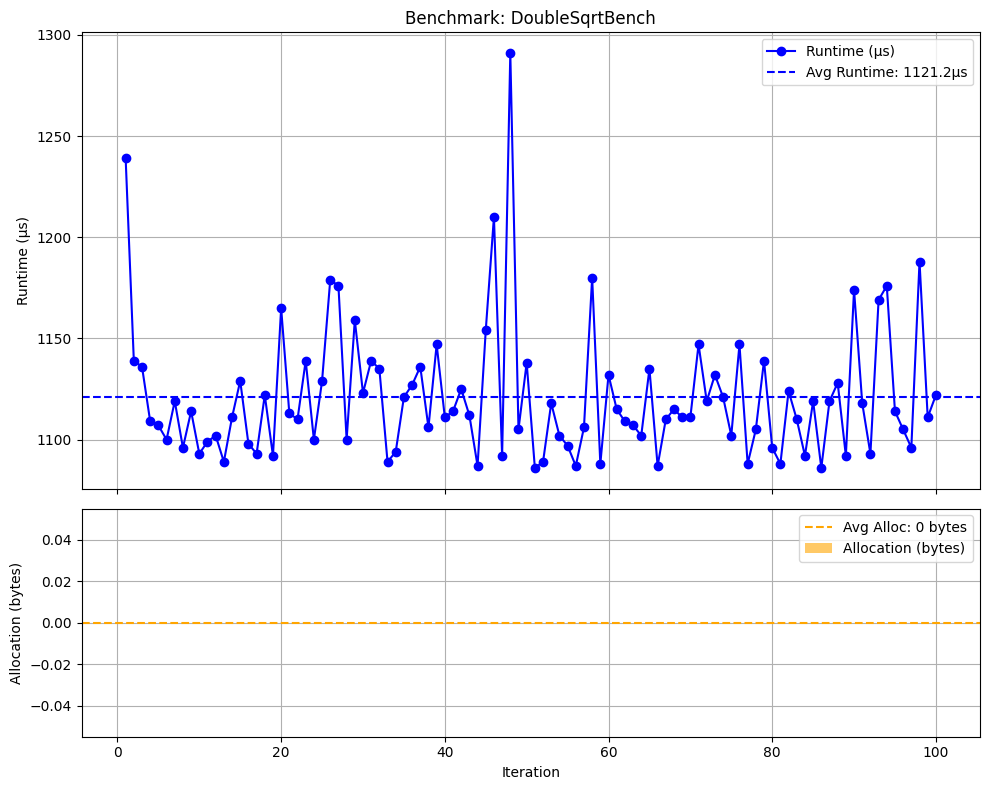

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [36, 31, 42, 32, 39, 31, 30, 29, 41, 30, 31, 34, 31, 30, 37, 42, 41, 41, 31, 31, 37, 39, 31, 35, 30, 30, 37, 39, 35, 39, 46, 31, 31, 33, 32, 37, 35, 38, 32, 30, 33, 30, 29, 37, 31, 29, 38, 31, 40, 38, 52, 30, 40, 37, 34, 30, 29, 37, 30, 32, 29, 34, 30, 34, 29, 30, 33, 30, 40, 38, 51, 30, 41, 38, 38, 32, 30, 38, 30, 40, 48, 37, 31, 37, 30, 38, 36, 39, 31, 41, 34, 31, 30, 30, 31, 31, 31, 36, 31, 40], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


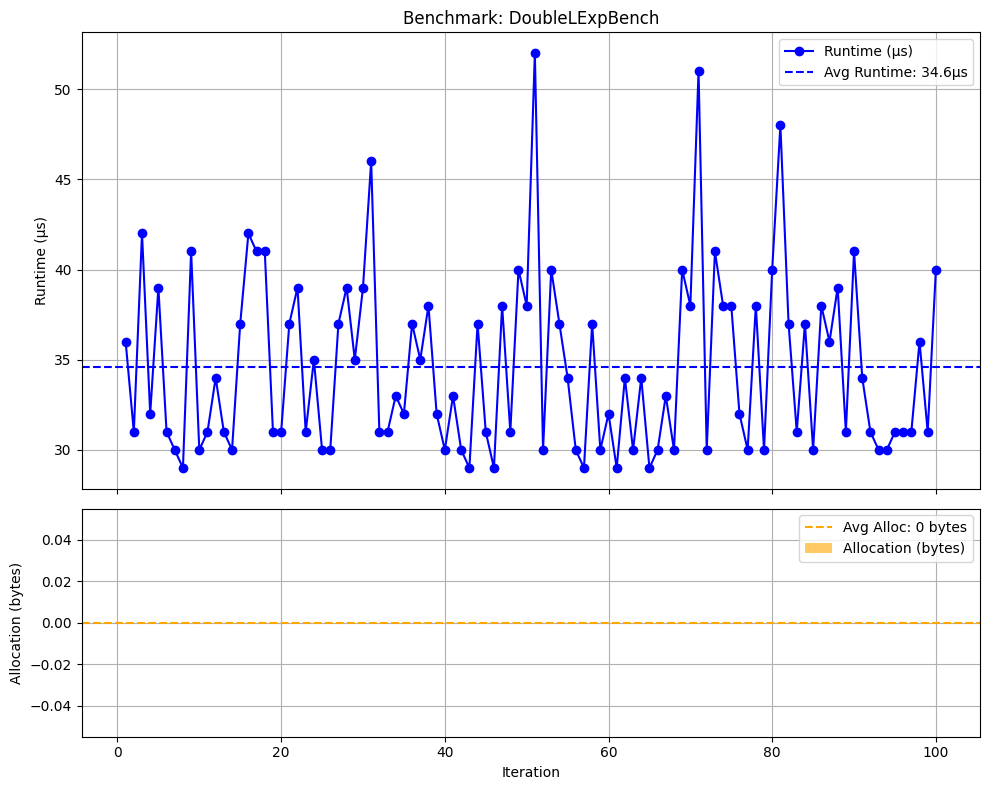

Benchmark: IntegerBench, Runs: 100, Runtimes: [5, 4, 3, 3, 3, 5, 4, 3, 4, 3, 3, 16, 2, 3, 5, 4, 4, 3, 5, 3, 3, 3, 5, 5, 4, 3, 4, 3, 4, 3, 3, 5, 5, 3, 5, 3, 3, 5, 4, 5, 4, 4, 4, 3, 3, 5, 4, 3, 5, 3, 5, 4, 5, 4, 5, 4, 4, 3, 4, 5, 4, 3, 3, 5, 5, 5, 4, 3, 3, 5, 3, 9, 3, 5, 5, 4, 3, 3, 4, 4, 4, 5, 3, 4, 3, 4, 4, 6, 4, 3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 18], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


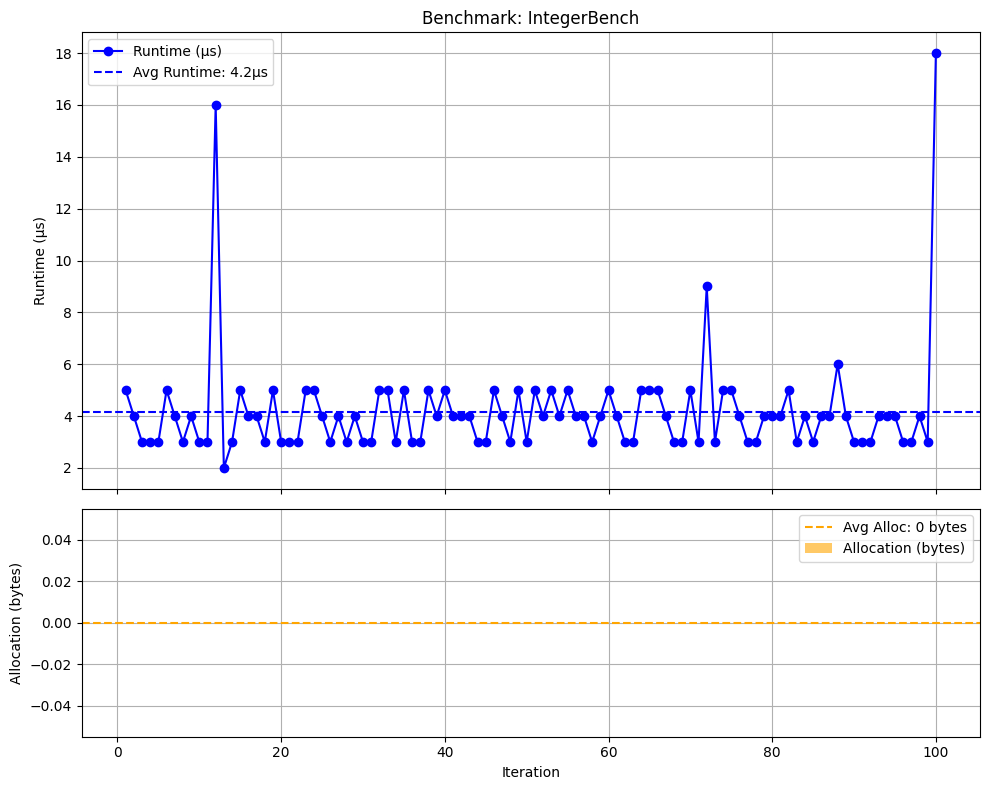

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [30, 13, 11, 11, 15, 12, 17, 11, 12, 14, 13, 11, 16, 10, 13, 10, 10, 10, 11, 10, 11, 14, 12, 13, 12, 26, 13, 11, 11, 11, 14, 16, 12, 12, 14, 15, 11, 12, 12, 11, 12, 18, 12, 10, 11, 12, 15, 14, 12, 12, 12, 15, 11, 11, 11, 10, 10, 12, 10, 12, 11, 13, 13, 11, 12, 11, 11, 11, 14, 11, 13, 13, 16, 13, 12, 12, 14, 13, 14, 13, 11, 12, 12, 15, 13, 14, 14, 13, 15, 14, 16, 12, 13, 16, 14, 11, 12, 25, 12, 12], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


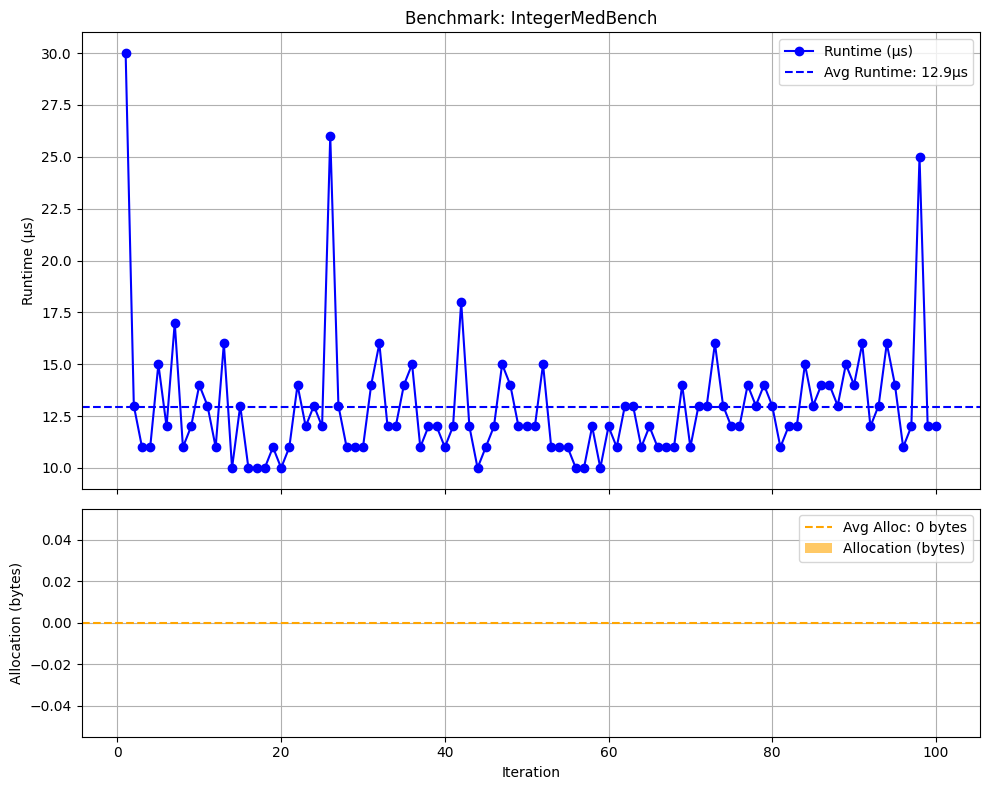

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [69, 170, 64, 69, 67, 76, 86, 71, 64, 67, 67, 73, 69, 64, 115, 65, 63, 66, 64, 65, 67, 65, 73, 71, 64, 64, 68, 64, 66, 68, 64, 73, 64, 70, 64, 64, 70, 72, 65, 69, 77, 66, 66, 68, 107, 84, 64, 71, 71, 64, 66, 65, 68, 67, 69, 67, 64, 65, 64, 69, 64, 67, 68, 64, 67, 67, 64, 83, 66, 70, 66, 71, 110, 64, 66, 66, 73, 65, 70, 84, 64, 68, 65, 79, 66, 64, 153, 64, 67, 66, 64, 64, 64, 67, 86, 68, 66, 69, 64, 71], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


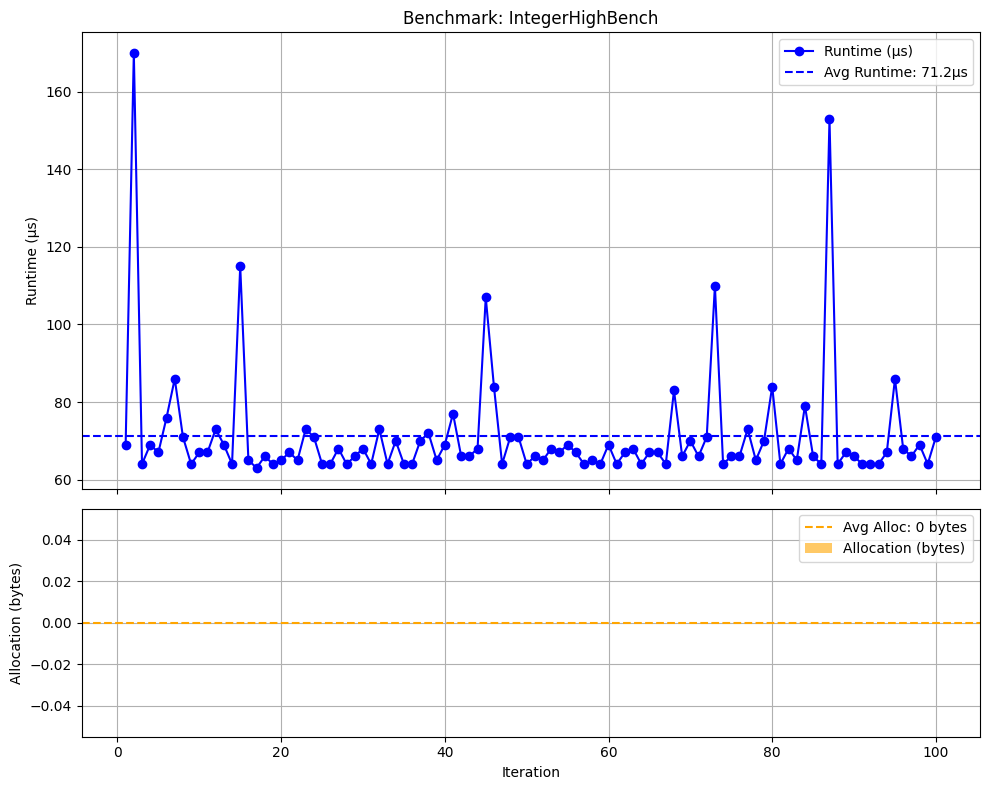

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [68, 48, 52, 48, 59, 47, 49, 54, 59, 62, 65, 54, 59, 48, 59, 47, 47, 54, 48, 56, 54, 54, 50, 48, 54, 56, 47, 58, 54, 49, 51, 55, 57, 60, 48, 51, 56, 52, 46, 61, 47, 54, 47, 47, 48, 60, 67, 55, 56, 50, 54, 53, 49, 47, 49, 54, 48, 48, 55, 48, 57, 55, 52, 58, 48, 52, 50, 56, 47, 55, 53, 48, 815, 50, 56, 55, 51, 52, 47, 54, 49, 52, 48, 58, 76, 48, 58, 49, 55, 55, 51, 50, 72, 48, 60, 50, 51, 51, 51, 54], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


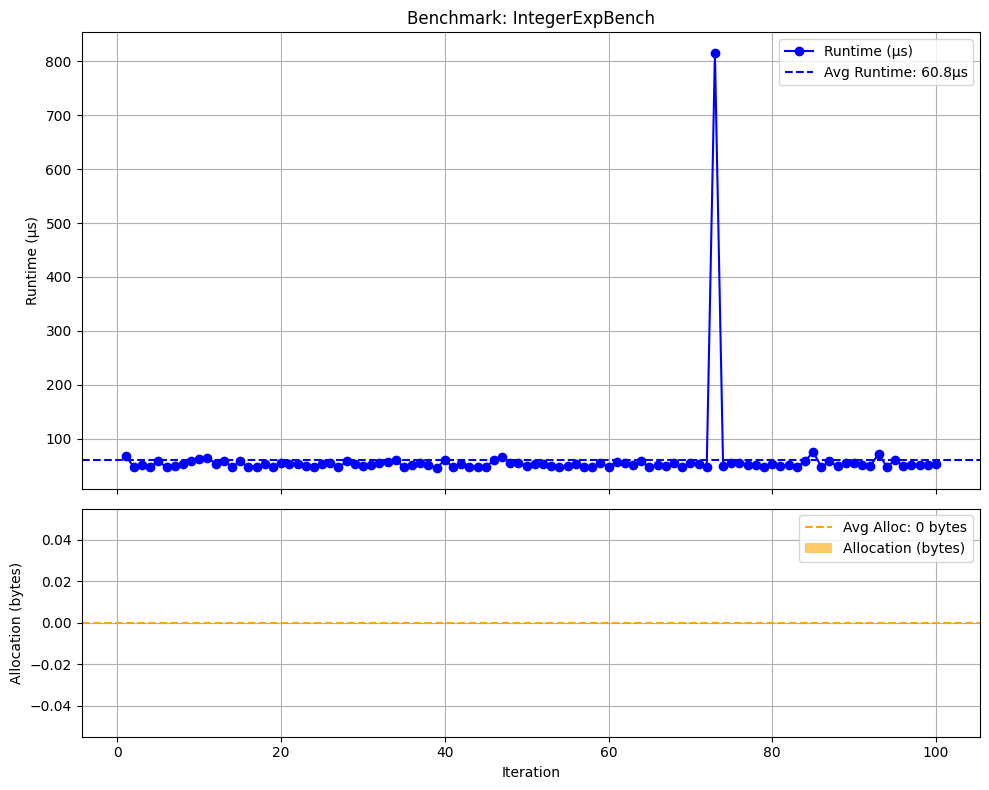

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [640, 778, 549, 594, 536, 579, 547, 524, 531, 620, 513, 532, 508, 576, 526, 544, 528, 544, 511, 563, 559, 516, 566, 542, 530, 557, 546, 535, 553, 521, 515, 532, 527, 533, 537, 568, 531, 520, 632, 522, 509, 563, 518, 542, 540, 518, 555, 541, 553, 523, 515, 563, 542, 522, 502, 528, 510, 565, 513, 541, 534, 515, 537, 535, 552, 601, 790, 557, 534, 537, 573, 517, 537, 538, 535, 537, 638, 551, 554, 525, 559, 572, 598, 526, 529, 558, 532, 518, 547, 526, 578, 555, 567, 531, 591, 515, 515, 517, 522, 562], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331

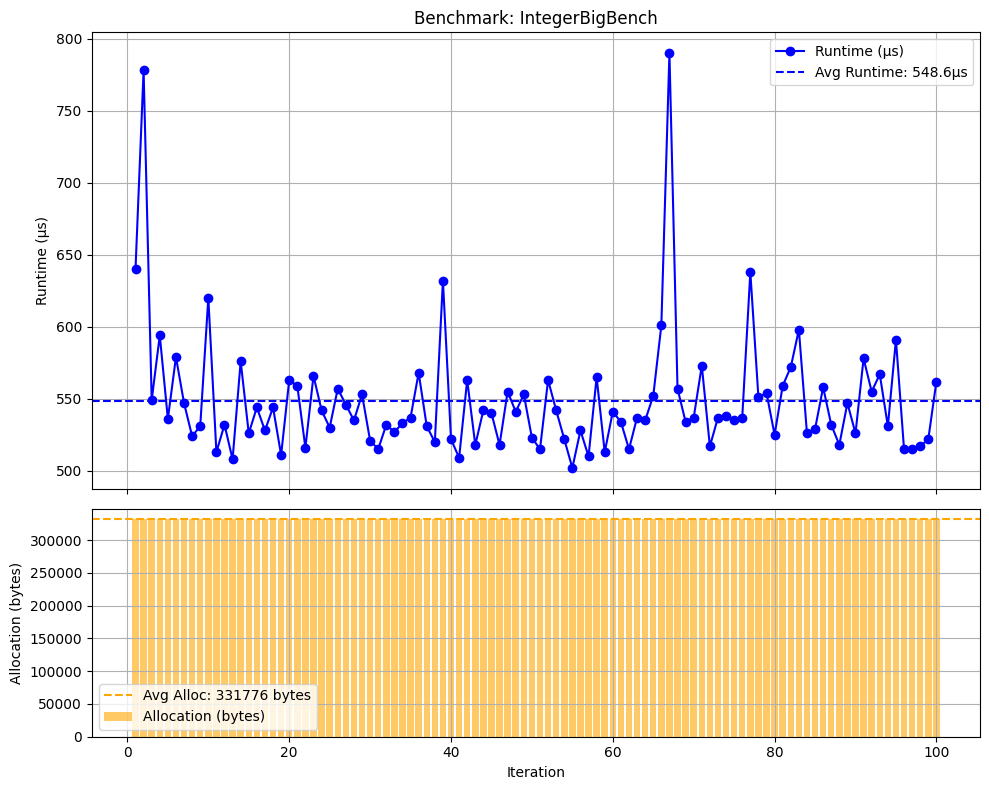

In [4]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])